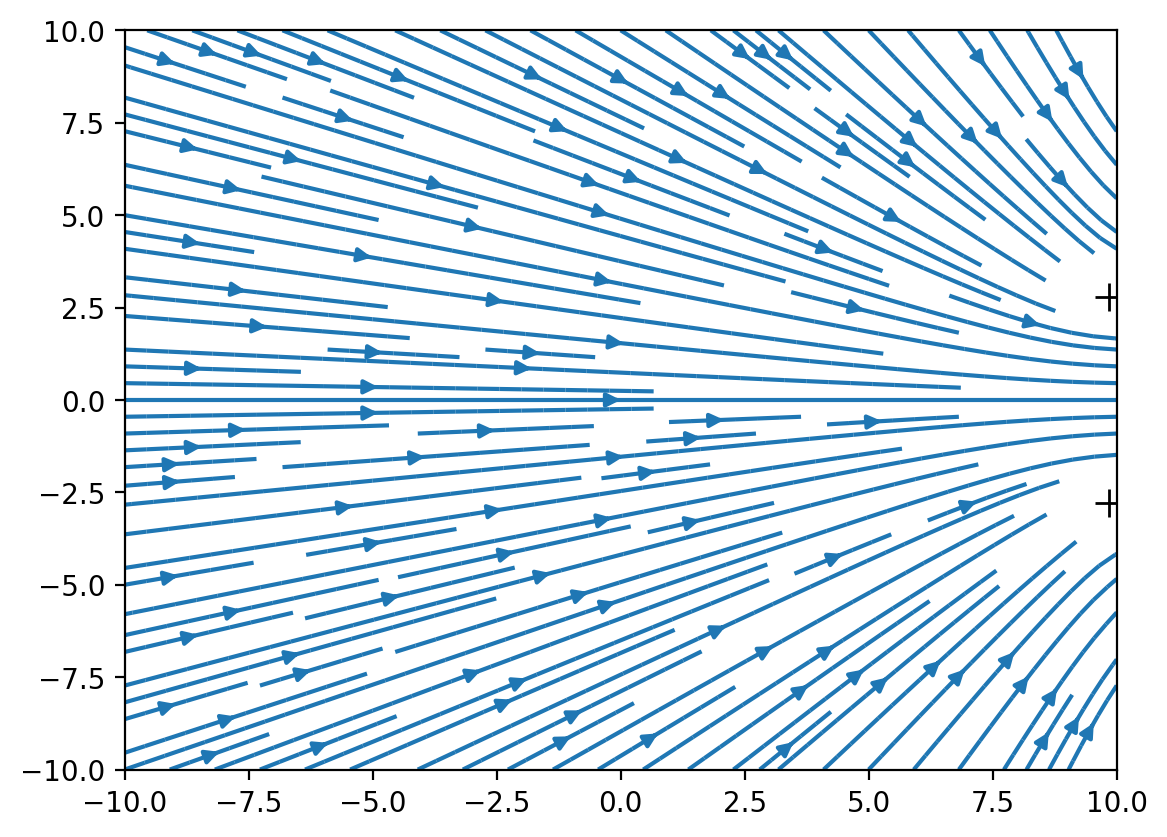

In [1]:
"""
Visualizing vortex leapfrogging
@author : Zhongan Lin
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

dt = 0.05
Nsteps = 50
k = 4
line_density = 1.5


# Setting up initial conditions (vortex centres and circulation) 
# Vortex rings
x_v = [-9,-9, -7, -7] #Positions of vortex centers
y_v = [3,-3, 3, -3] 
k_v = [k,-k, k, -k] #Circulation of vortices

# Setting up the plot
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# mark the initial positions of vortices
ax.plot(x_v, y_v, 'k+', markersize=10)

# draw the initial velocity streamline
ngrid = 10
Y, X = np.mgrid[-ngrid:ngrid:400j, -ngrid:ngrid:400j]
#360j sets the resolution of the cartesian grid; play around with it as you see fit

vel_x = np.zeros(np.shape(Y)) #this holds x−velocity 
vel_y = np.zeros(np.shape(Y)) #this holds y−velocity

# masking radius for better visualization of the vortex centres 
r_mask = 1

for i in range(len(x_v)): #looping over each vortex
    # computing the total velocity field
    xi = x_v[i] ; yi = y_v[i]
    k = k_v[i]
    dx = X - xi; dy = Y - yi
    r = np.sqrt(dx**2 + dy**2)
    vel_x += -k*dy/r # phi-hat perpendicular to r
    vel_y += k*dx/r
    # for masking (set the masking area to NaN)
    vel_x[r < r_mask] = np.NaN
    vel_y[r < r_mask] = np.NaN
    
# set up the boundaries of the simulation box 
ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])
# initial plot of the streamlines 
ax.streamplot(X, Y, vel_x , vel_y , density=[line_density,line_density])
display(fig)
clear_output(wait=True)
plt.pause(0.5)

# ----------------------------------------------------------------------
# Evolution
count = 0
while count < Nsteps :
    
    # Initialize advection velocities of the vortices
    Vx = np.zeros(np.shape(y_v))
    Vy = np.zeros(np.shape(y_v))
    # compute the total advection velocity on each vortex
    for i in range(len(x_v)):
        xi = x_v[i] ; yi = y_v[i]
        for j in range(len(x_v)): # speed of vortex i due to vortex j
            if j == i:
                continue
            k = k_v[j]
            xj = x_v[j] ; yj = y_v[j]
            dx = xi - xj ; dy = yi - yj
            r = np.sqrt(dx**2 + dy**2)
            Vx[i] += -k*dy/r
            Vy[i] += k*dx/r
    
    
    # update the positions of vortices
    for i in range(len(x_v)):
        x_v[i] += Vx[i]*dt
        y_v[i] += Vy[i]*dt
        
    
    # re−initialize the total velocity field
    vel_x = np.zeros(np.shape(Y)) #this holds x−velocity 
    vel_y = np.zeros(np.shape(Y)) #this holds y−velocity
    
    # Re-drawing streamlines
    for i in range(len(x_v)):
        # computing the total velocity field
        xi = x_v[i] ; yi = y_v[i]
        k = k_v[i]
        dx = X - xi; dy = Y - yi
        r = np.sqrt(dx**2 + dy**2)
        vel_x += -k*dy/r # phi-hat perpendicular to r
        vel_y += k*dx/r
        # for masking (set the masking area to NaN)
        vel_x[r < r_mask] = np.NaN
        vel_y[r < r_mask] = np.NaN

    # update plot
    ax.cla()
    ax.set_xlim([-ngrid, ngrid])
    ax.set_ylim([-ngrid, ngrid])
    ax.plot(x_v, y_v, 'k+', markersize=10)
    ax.streamplot(X, Y, vel_x , vel_y , density=[line_density,line_density])
    
    display(fig)
    clear_output(wait=True)
    plt.pause(0.005) #play around with the delay time for better visualization
    count += 1